# Implementation 1

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## Importing the dataset

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['label'] = cancer['target']
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
df.shape

(569, 31)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Splitting the dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [7]:
X_train.shape

(398, 30)

## KPCA tunning

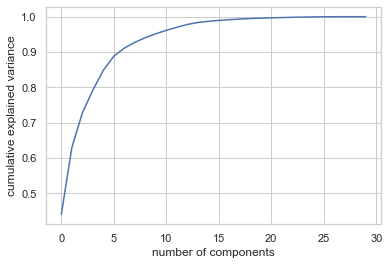

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.440727,0.440727
1,0.629490,0.188763
2,0.727523,0.098033
3,0.792167,0.064644
4,0.848335,0.056168
5,0.888156,0.039821
6,0.911149,0.022993
7,0.927372,0.016223
8,0.940642,0.013270
9,0.951648,0.011006


In [8]:
from sklearn.decomposition import KernelPCA
kpca_test = KernelPCA()
kpca_test = kpca_test.fit_transform(X_train)
explained_variance = np.var(kpca_test, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

sns.set(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

evr = explained_variance_ratio
cvr = np.cumsum(explained_variance_ratio)

kpca_df = pd.DataFrame()
kpca_df['Cumulative Variance Ratio'] = cvr
kpca_df['Explained Variance Ratio'] = evr
display(kpca_df.head(15))

## KPCA tunned

In [9]:
kpca = KernelPCA(n_components=2)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [10]:
X_train.shape

(398, 2)

## SVC hyperparameter tuning

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [ 0.1, 1, 10, 100, 1000], 
     'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100, 1000],
     'kernel': ['linear']},
]
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)
classifier = grid

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] 

[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ............................. C=100, kernel=linear, total=   0.0s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   0.1s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   0.1s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   0.2s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   0.1s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   0.0s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.1s finished


In [12]:
grid.best_params_

{'C': 10, 'kernel': 'linear'}

## Predicting using the test set

In [13]:
y_pred = grid.predict(X_test)

## Evaluating

In [14]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', np.round(metrics.accuracy_score(y_test, y_pred), 4))
print('Precision:', np.round(metrics.precision_score(y_test, y_pred), 4))
print('Recall:', np.round(metrics.recall_score(y_test, y_pred), 4))
print('F1-Score:', np.round(metrics.f1_score(y_test, y_pred), 4))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[ 58   4]
 [  5 104]]
Accuracy: 0.9474
Precision: 0.963
Recall: 0.9541
F1-Score: 0.9585
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        62
           1       0.96      0.95      0.96       109

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


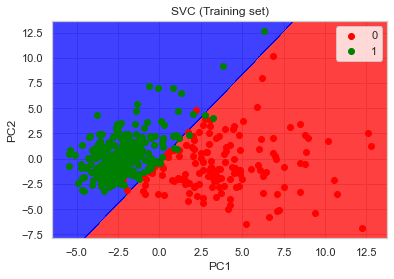

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


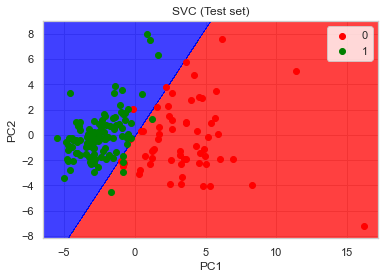

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Implementation 2

## Importing the dataset

In [17]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [18]:
dataset.shape

(178, 14)

In [19]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Splitting the dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Feature scaling

In [21]:
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [22]:
X_train.shape

(142, 13)

## KPCA Tunning

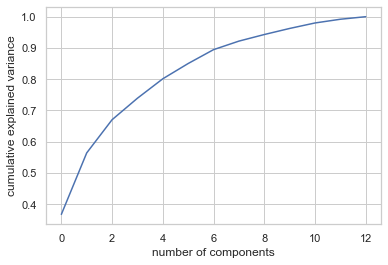

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.367551,0.367551
1,0.564172,0.196621
2,0.670337,0.106165
3,0.739150,0.068813
4,0.801321,0.062171
5,0.850185,0.048865
6,0.894548,0.044363
7,0.921857,0.027308
8,0.942926,0.021069
9,0.962359,0.019433


In [23]:
from sklearn.decomposition import KernelPCA
kpca_test = KernelPCA()
kpca_test = kpca_test.fit_transform(X_train)
explained_variance = np.var(kpca_test, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

sns.set(style='whitegrid')
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())

evr = explained_variance_ratio
cvr = np.cumsum(explained_variance_ratio)

kpca_df = pd.DataFrame()
kpca_df['Cumulative Variance Ratio'] = cvr
kpca_df['Explained Variance Ratio'] = evr
display(kpca_df.head(15))

## KPCA Tunned

In [24]:
kpca = KernelPCA(n_components=2)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

## SVC hyperparameter tuning

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [ 0.1, 1, 10, 100, 1000], 
     'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
     'kernel': ['rbf']},
    {'C': [0.1, 1, 10, 100, 1000],
     'kernel': ['linear']},
]
grid = GridSearchCV(SVC(), param_grid, verbose=2)
grid.fit(X_train, y_train)
classifier = grid

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=0.1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] 

[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C

[CV] ............................ C=1000, kernel=linear, total=   0.0s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   0.0s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   0.0s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


In [26]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

## Predicting using the test set

In [27]:
y_pred = grid.predict(X_test)

## Evaluating

In [28]:
from sklearn import metrics
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.93      1.00      0.97        14
           3       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


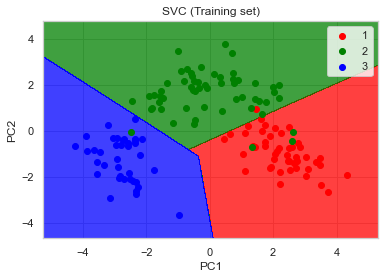

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


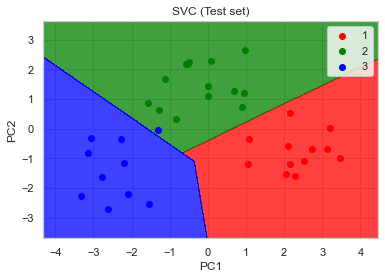

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('SVC (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()